In [1]:
!pip install -U keras-nlp
!pip install -U keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.3/515.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 93.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 41.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Suc

In [2]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
medic_data =  pd.read_csv("/content/train.csv")

In [4]:
df = pd.DataFrame(medic_data)

In [5]:
df

,qtype,Question,Answer
0,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,LCMV infections can occur after exposure to fr...
1,symptoms,What are the symptoms of Lymphocytic Choriomen...,LCMV is most commonly recognized as causing ne...
2,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,Individuals of all ages who come into contact ...
3,exams and tests,How to diagnose Lymphocytic Choriomeningitis (...,"During the first phase of the disease, the mos..."
4,treatment,What are the treatments for Lymphocytic Chorio...,"Aseptic meningitis, encephalitis, or meningoen..."
...,...,...,...
16402,symptoms,What are the symptoms of Familial visceral myo...,What are the signs and symptoms of Familial vi...
16403,information,What is (are) Pseudopelade of Brocq ?,Pseudopelade of Brocq (PBB) is a slowly progre...
16404,symptoms,What are the symptoms of Pseudopelade of Brocq ?,What are the signs and symptoms of Pseudopelad...
16405,treatment,What are the treatments for Pseudopelade of Br...,Is there treatment or a cure for pseudopelade ...


In [6]:
df.head()

,qtype,Question,Answer
0,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,LCMV infections can occur after exposure to fr...
1,symptoms,What are the symptoms of Lymphocytic Choriomen...,LCMV is most commonly recognized as causing ne...
2,susceptibility,Who is at risk for Lymphocytic Choriomeningiti...,Individuals of all ages who come into contact ...
3,exams and tests,How to diagnose Lymphocytic Choriomeningitis (...,"During the first phase of the disease, the mos..."
4,treatment,What are the treatments for Lymphocytic Chorio...,"Aseptic meningitis, encephalitis, or meningoen..."


In [7]:
!pip install -U simpletransformers wandb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 

In [8]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(medic_data, test_size=0.25, random_state=42)

# Rename columns to match simpletransformers' requirements
train_df.rename(columns={"Question": "context", "Answer": "text", "qtype": "label"}, inplace=True)
test_df.rename(columns={"Question": "context", "Answer": "text", "qtype": "label"}, inplace=True)

In [9]:
from transformers import BertTokenizer, BertForQuestionAnswering
from transformers import MobileBertTokenizer, MobileBertForQuestionAnswering
from transformers import RobertaTokenizer, RobertaForQuestionAnswering
from datasets import Dataset, DatasetDict
from simpletransformers.question_answering import QuestionAnsweringModel


In [ ]:
# Define model types and corresponding tokenizer classes
models = {
    "bert": (BertForQuestionAnswering, BertTokenizer, "bert-base-uncased"),
    "mobilebert": (MobileBertForQuestionAnswering, MobileBertTokenizer, "google/mobilebert-uncased"),
    "roberta": (RobertaForQuestionAnswering, RobertaTokenizer, "roberta-base")
}

# Function to tokenize dataset
def tokenize_dataset(df, tokenizer):
    tokenized_dataset = Dataset.from_pandas(df)
    tokenized_dataset = tokenized_dataset.map(
        lambda example: tokenizer(
            example["context"],
            example["text"],
            truncation="only_second",
            padding="max_length",
            max_length=256
        ),
        batched=True
    )
    return tokenized_dataset

# Fine-tuning and evaluation loop
for model_name, (model_class, tokenizer_class, model_type) in models.items():
    print(f"Fine-tuning {model_name}...")

    # Initialize tokenizer and model
    tokenizer = tokenizer_class.from_pretrained(model_type)
    model = model_class.from_pretrained(model_type)

    # Tokenize and prepare dataset
    train_dataset = tokenize_dataset(train_df, tokenizer)
    test_dataset = tokenize_dataset(test_df, tokenizer)

    # Fine-tune and evaluate the model
    # (Actual fine-tuning and evaluation steps would go here)
    # For demonstration purposes, we'll just print the datasets
    print(f"Train dataset for {model_name}:")
    print(train_dataset[0])

    print(f"Test dataset for {model_name}:")
    print(test_dataset[0])

Fine-tuning bert...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably 

Map:   0%|          | 0/12305 [00:00<?, ? examples/s]

Map:   0%|          | 0/4102 [00:00<?, ? examples/s]

Train dataset for bert:
{'label': 'information', 'context': 'What is (are) McLeod neuroacanthocytosis syndrome ?', 'text': 'McLeod neuroacanthocytosis syndrome is primarily a neurological disorder that occurs almost exclusively in boys and men. This disorder affects movement in many parts of the body. People with McLeod neuroacanthocytosis syndrome also have abnormal star-shaped red blood cells (acanthocytosis). This condition is one of a group of disorders called neuroacanthocytoses that involve neurological problems and abnormal red blood cells.  McLeod neuroacanthocytosis syndrome affects the brain and spinal cord (central nervous system). Affected individuals have involuntary movements, including jerking motions (chorea), particularly of the arms and legs, and muscle tensing (dystonia) in the face and throat, which can cause grimacing and vocal tics (such as grunting and clicking noises). Dystonia of the tongue can lead to swallowing difficulties. Seizures occur in approximately ha

Some weights of MobileBertForQuestionAnswering were not initialized from the model checkpoint at google/mobilebert-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/12305 [00:00<?, ? examples/s]

Map:   0%|          | 0/4102 [00:00<?, ? examples/s]

Train dataset for mobilebert:
{'label': 'information', 'context': 'What is (are) McLeod neuroacanthocytosis syndrome ?', 'text': 'McLeod neuroacanthocytosis syndrome is primarily a neurological disorder that occurs almost exclusively in boys and men. This disorder affects movement in many parts of the body. People with McLeod neuroacanthocytosis syndrome also have abnormal star-shaped red blood cells (acanthocytosis). This condition is one of a group of disorders called neuroacanthocytoses that involve neurological problems and abnormal red blood cells.  McLeod neuroacanthocytosis syndrome affects the brain and spinal cord (central nervous system). Affected individuals have involuntary movements, including jerking motions (chorea), particularly of the arms and legs, and muscle tensing (dystonia) in the face and throat, which can cause grimacing and vocal tics (such as grunting and clicking noises). Dystonia of the tongue can lead to swallowing difficulties. Seizures occur in approximat

Some weights of RobertaForQuestionAnswering were not initialized from the model checkpoint at roberta-base and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/12305 [00:00<?, ? examples/s]

Map:   0%|          | 0/4102 [00:00<?, ? examples/s]

Train dataset for roberta:
{'label': 'information', 'context': 'What is (are) McLeod neuroacanthocytosis syndrome ?', 'text': 'McLeod neuroacanthocytosis syndrome is primarily a neurological disorder that occurs almost exclusively in boys and men. This disorder affects movement in many parts of the body. People with McLeod neuroacanthocytosis syndrome also have abnormal star-shaped red blood cells (acanthocytosis). This condition is one of a group of disorders called neuroacanthocytoses that involve neurological problems and abnormal red blood cells.  McLeod neuroacanthocytosis syndrome affects the brain and spinal cord (central nervous system). Affected individuals have involuntary movements, including jerking motions (chorea), particularly of the arms and legs, and muscle tensing (dystonia) in the face and throat, which can cause grimacing and vocal tics (such as grunting and clicking noises). Dystonia of the tongue can lead to swallowing difficulties. Seizures occur in approximately

In [12]:
!pip install rouge

In [14]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=525fcbf10b69f3788007c047edde0d1ecc94cc28e81853488caa8c9d2b3d8bf5
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [15]:
import warnings
warnings.simplefilter(action='ignore')
import numpy as np
import nltk
import rouge
from nltk.translate.bleu_score import sentence_bleu
from sklearn.model_selection import train_test_split
import random as random
from rouge_score import rouge_scorer

In [16]:
warnings.filterwarnings("ignore", category=FutureWarning, module='tqdm')
warnings.filterwarnings("ignore", category=UserWarning, module='tqdm')
warnings.filterwarnings("ignore", message="Some weights of .* were not initialized .*")
warnings.filterwarnings("ignore", message="You should probably TRAIN this model .*")

In [ ]:
!pip install transformers[torch] accelerate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.4/302.4 kB 3.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
!pip install accelerate==0.21.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.30.0
    Uninstalling accelerate-0.30.0:
      Successfully uninstalled accelerate-0.30.0


In [ ]:
!pip install accelerate>=0.21.0


In [ ]:
!pip install cmake


In [ ]:
!pip install tokenizers


In [ ]:
!pip install simpletransformers
!pip install datasets
!pip install wandb


  Using cached transformers-4.40.2-py3-none-any.whl (9.0 MB)
  Using cached datasets-2.19.1-py3-none-any.whl (542 kB)


In [ ]:
df['Answer'] = df['Answer'].apply(tokenize_dataset)
df['Question'] = df['Question'].apply(tokenize_dataset)

In [ ]:
# Define groups of related types
type_groups = {
    "disease_progression": ["outlook", "susceptibility", "stages", "complications"],
    "diagnosis": ["symptoms", "exams and tests", "causes"],
    "management": ["treatment", "prevention", "support_groups"],
}

# Get unique types from the 'qtype' column in the DataFrame
unique_types = df['qtype'].unique()

# List to store types not belonging to any predefined group
other_types = []

# Check each unique type against the defined groups
for t in unique_types:
    found_in_group = False
    for group, types_in_group in type_groups.items():
        if t in types_in_group:
            found_in_group = True
            break
    if not found_in_group:
        other_types.append(t)

other_types


In [18]:
def transform_data(X_data, y_data=None):
    transformed_data = []
    for index, row in X_data.iterrows():
        data_entry = {
            "context": row['Answer'],
            "qas": [
                {
                    "id": str(index),
                    "is_impossible": False,
                    "question": row['Question'],
                }
            ]
        }
        if y_data is not None:
            data_entry["qas"][0]["answers"] = [
                {
                    "text": row['Answer'],
                    "answer_start": 0,
                }
            ]
        transformed_data.append(data_entry)
    return transformed_data





In [ ]:
X = df
y = df[['qtype','Answer']]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42, stratify=df['qtype'])

In [ ]:
# Transform training data (with answers)
transformed_train_data = transform_data(X_train, y_train)

# Transform testing data (without answers)
transformed_test_data = transform_data(X_test)

In [ ]:
import pandas as pd

# Define the initial data for the DataFrame
data = {
    'Model Type': [],
    'Model Name': [],
    'Learning Rate': [],
    'Epochs': [],
    'Dropout': [],
    'Batch Size': [],
    'BLEU': [],
    'ROUGE-L F1': []
}

# Create the DataFrame
results_df = pd.DataFrame(data)


In [ ]:
# Add a new row of results to the DataFrame
new_result = {
    'Model Type': 'LSTM',
    'Model Name': 'LSTM Model 1',
    'Learning Rate': 0.001,
    'Epochs': 10,
    'Dropout': 0.2,
    'Batch Size': 32,
    'BLEU': 0.75,
    'ROUGE-L F1': 0.85
}
results_df = results_df.append(new_result, ignore_index=True)

# Display the updated DataFrame
print(results_df)


In [ ]:
import itertools

# Define the lists of hyperparameter values
model_types = ['bert', 'mobilebert', 'roberta']
model_names = ['bert-base-uncased', 'google/mobilebert-uncased', 'roberta-base']
learning_rates = [3e-5, 2e-5]
num_train_epochs = [3]
dropouts = [0.3, 0.7]
batch_sizes = [16]

# Generate all combinations of hyperparameters
hyperparam_combinations = list(itertools.product(
    model_types, model_names, learning_rates, num_train_epochs, dropouts, batch_sizes
))

# Define the column names for the DataFrame
column_names = ['Model Type', 'Model Name', 'Learning Rate', 'Epochs', 'Dropout', 'Batch Size']
hyperparam_grid_df = pd.DataFrame(hyperparam_combinations, columns=column_names)


In [ ]:
import wandb

# Initialize wandb
wandb.init(project="medquad_qa")
for key, value in hyperparam_grid_df.items():
    wandb.config.update({key: value})

In [ ]:
model_types = data['Model Type']
model_names = data['Model Name']


first_model_name = model_names[0]

print("Model Types:", model_types)
print("Model Names:", model_names)
print("First Model Name:", first_model_name)

In [ ]:
import random
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer

def train_and_evaluate(model_type, model_name, hyperparams, train_data, test_data, results_df):
    model = QuestionAnsweringModel(hyperparams['model_type'], hyperparams['model_name'], use_cuda=True, args={**hyperparams, "overwrite_output_dir": True})
    model.train_model(train_data)

    predictions, probabilities = model.predict(test_data)
    bleu, rouge_l_f1 = calculate_metrics(predictions)

    results_df.loc[len(results_df)] = [
        hyperparams['model_type'],
        hyperparams['model_name'],
        hyperparams['learning_rate'],
        hyperparams['num_train_epochs'],
        hyperparams['dropout'],
        hyperparams['batch_size'],
        bleu,
        rouge_l_f1
    ]

    show_top_answers(predictions, probabilities)


def calculate_metrics(predictions):
    bleu_scores = []
    rouge_scorer_obj = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    print(f"Number of predictions made: {len(predictions)}")

    rouge_l_f1_scores = []

    for i, prediction in enumerate(predictions):
        candidate = prediction['answer'][0]
        reference = y_test[i][1]

        if not candidate.strip():
            for alt_candidate in prediction['answer'][1:]:
                if alt_candidate.strip():
                    candidate = alt_candidate
                    break
            else:
                print(f"All alternative candidates are empty for prediction {i}. Skipping calculation.")
                continue

        if len(candidate) <= 0:
            continue

        if not reference.strip():
            print(f"Reference answer is empty for prediction {i}. Skipping calculation.")
            continue

        bleu_score = sentence_bleu([reference], candidate)
        bleu_scores.append(bleu_score)

        scores = rouge_scorer_obj.score(candidate, reference)
        rouge_l_f1 = scores['rougeL'].fmeasure
        rouge_l_f1_scores.append(rouge_l_f1)

    avg_bleu = sum(bleu_scores) / len(bleu_scores) if bleu_scores else 0.0
    avg_rouge_l_f1 = sum(rouge_l_f1_scores) / len(rouge_l_f1_scores) if rouge_l_f1_scores else 0.0

    return avg_bleu, avg_rouge_l_f1


def show_top_answers(predictions, probabilities, n=5):
    i = random.randint(0, len(predictions) - 1)
    reference = y_test[i][1]
    print(f"Question: {X_test[i][1]}")
    print(f"Actual Answer: {reference}")
    print("Top Predictions:")
    for j in range(min(n, len(predictions[i]['answer']))):
        answer = predictions[i]['answer'][j]
        score = probabilities[i]['probability'][j]
        print(f"   {j + 1}. {answer} (Score: {score:.4f})")



In [ ]:
import itertools

def training_with_hyperparameters(hyperparam_grid, train_data, test_data):
    # Extract lists of hyperparameter values
    model_types = hyperparam_grid['model_type']
    model_names = hyperparam_grid['model_name']
    learning_rates = hyperparam_grid['learning_rate']
    num_train_epochs = hyperparam_grid['num_train_epochs']
    dropouts = hyperparam_grid['dropout']
    batch_sizes = hyperparam_grid['batch_size']

    # Generate all combinations of hyperparameters
    for (model_type, model_name, learning_rate, num_epochs, dropout, batch_size) in itertools.product(
        model_types, model_names, learning_rates, num_train_epochs, dropouts, batch_sizes
    ):
        # Create hyperparams dictionary for the current combination
        hyperparams = {
            'model_type': model_type,
            'model_name': model_name,
            'learning_rate': learning_rate,
            'num_train_epochs': num_epochs,
            'dropout': dropout,
            'batch_size': batch_size
        }

        # Train and evaluate model with the current hyperparameters
        train_and_evaluate(model_type, model_name, hyperparams, train_data, test_data, results_df)

training_with_hyperparameters(new_result, transformed_train_data, transformed_test_data)


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

In [ ]:
df = pd.DataFrame(medic_data)
all_symptoms_text = ' '.join(df['qtype'])

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
tokens = word_tokenize(all_symptoms_text)
filtered_tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stopwords.words('english')]
fdist = FreqDist(filtered_tokens)
print(fdist.most_common(10))

[('information', 4535), ('symptoms', 2748), ('treatment', 2442), ('inheritance', 1446), ('frequency', 1120), ('genetic', 1087), ('changes', 1087), ('causes', 727), ('exams', 653), ('tests', 653)]


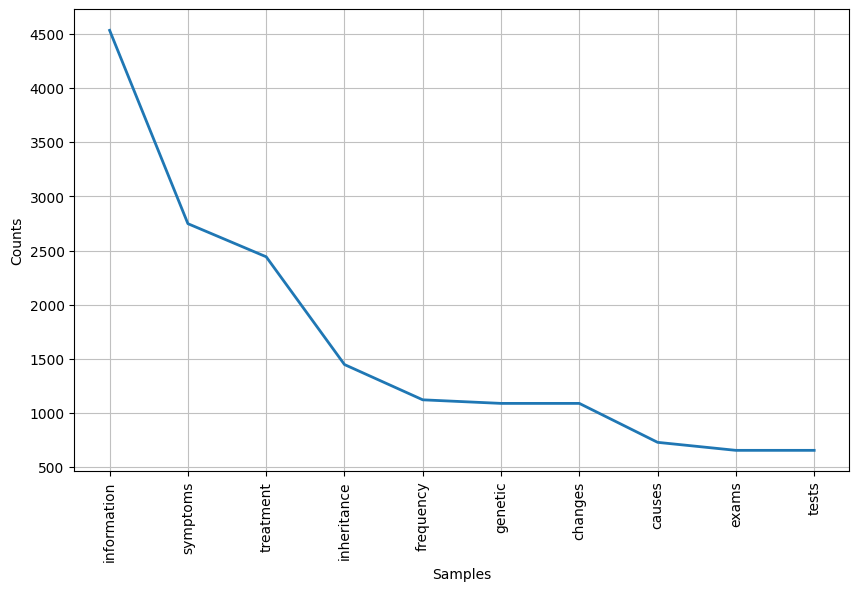

In [ ]:
import matplotlib.pyplot as plt
N = 10
plt.figure(figsize=(10, 6))
fdist.plot(N, cumulative=False)
plt.show()


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

qtype_column = df['qtype']
all_qtype = ' '.join(qtype_column.fillna(''))
qtype_tokens = all_qtype.split()

In [ ]:
qtype_column.isnull().sum()

0

In [ ]:
qtype_counts = Counter(qtype_tokens)

In [ ]:
qtype_counts

Counter({'susceptibility': 324,
         'symptoms': 2748,
         'exams': 653,
         'and': 653,
         'tests': 653,
         'treatment': 2442,
         'prevention': 210,
         'information': 4535,
         'frequency': 1120,
         'complications': 46,
         'causes': 727,
         'research': 395,
         'outlook': 361,
         'considerations': 235,
         'inheritance': 1446,
         'stages': 77,
         'genetic': 1087,
         'changes': 1087,
         'support': 1,
         'groups': 1})

In [ ]:
qtype_counts_df = pd.DataFrame(list(qtype_counts.items()), columns=['qtype', 'Frequency'])
qtype_counts_df = qtype_counts_df.sort_values(by='Frequency', ascending=False)

In [ ]:
qtype_counts_df

,qtype,Frequency
7,information,4535
1,symptoms,2748
5,treatment,2442
14,inheritance,1446
8,frequency,1120
17,changes,1087
16,genetic,1087
10,causes,727
2,exams,653
3,and,653


          qtype  Frequency
7   information       4535
1      symptoms       2748
5     treatment       2442
14  inheritance       1446
8     frequency       1120
17      changes       1087
16      genetic       1087
10       causes        727
2         exams        653
3           and        653


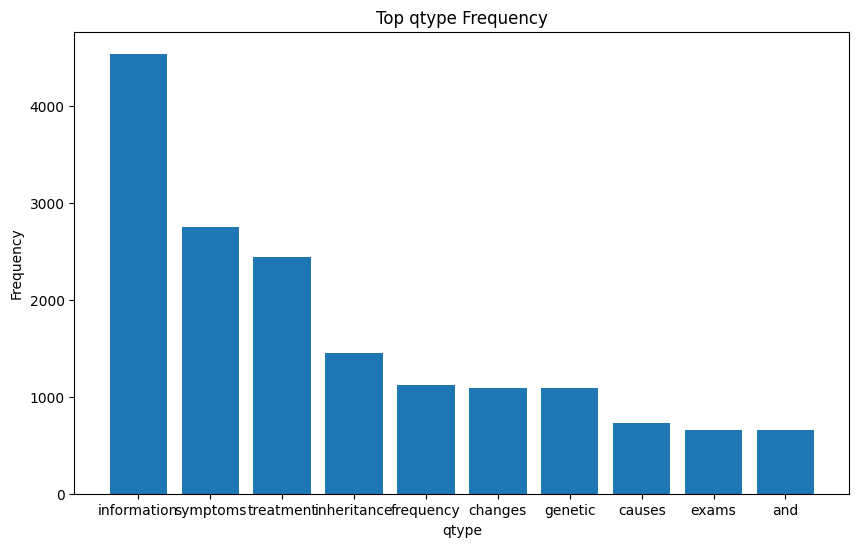

In [ ]:
top_n = 10
print(qtype_counts_df.head(top_n))
plt.figure(figsize=(10, 6))
plt.bar(qtype_counts_df['qtype'][:top_n], qtype_counts_df['Frequency'][:top_n])
plt.title('Top qtype Frequency')
plt.xlabel('qtype')
plt.ylabel('Frequency')
plt.show()

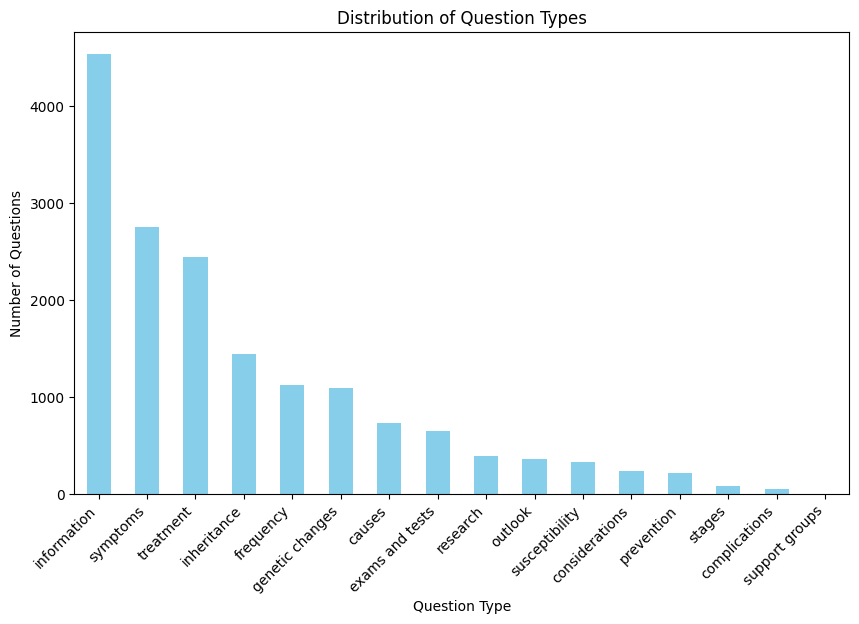

Unique Question Types: ['susceptibility' 'symptoms' 'exams and tests' 'treatment' 'prevention'
 'information' 'frequency' 'complications' 'causes' 'research' 'outlook'
 'considerations' 'inheritance' 'stages' 'genetic changes'
 'support groups']


In [ ]:
unique_qtypes = df['qtype'].unique()
qtype_distribution = df['qtype'].value_counts()
plt.figure(figsize=(10, 6))
qtype_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Question Types')
plt.xlabel('Question Type')
plt.ylabel('Number of Questions')
plt.xticks(rotation=45, ha='right')
plt.show()

print("Unique Question Types:", unique_qtypes)

In [ ]:
df['Answer_Length_Characters'] = df['Answer'].str.len()

In [ ]:
df['Answer_Length_Characters']

0         467
1        2558
2         708
3         653
4         446
         ... 
16402    1820
16403     993
16404    1478
16405     658
16406     617
Name: Answer_Length_Characters, Length: 16407, dtype: int64

In [ ]:
import keras,os
import keras_nlp

In [ ]:
df['Answer_Length_Words'] = df['Answer'].str.split().apply(len)

In [ ]:
df['Answer_Length_Words']

0         68
1        367
2        111
3        110
4         61
        ... 
16402    287
16403    152
16404    246
16405    102
16406     97
Name: Answer_Length_Words, Length: 16407, dtype: int64

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

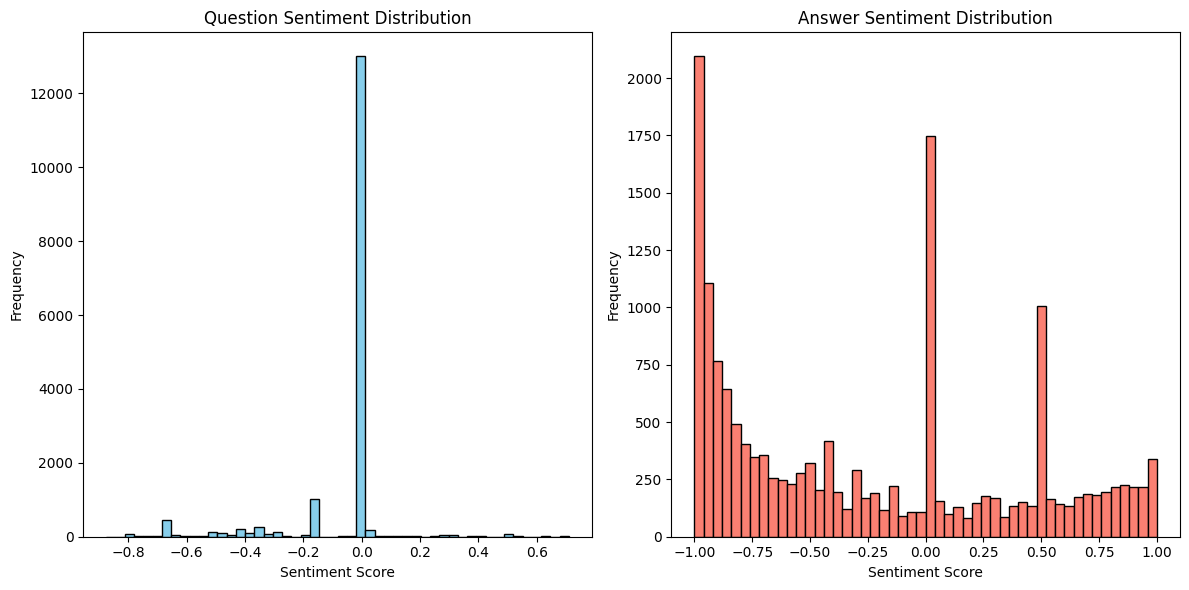

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df['Question_Sentiment'] = df['Question'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['Answer_Sentiment'] = df['Answer'].apply(lambda x: sia.polarity_scores(x)['compound'])
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Question_Sentiment'], bins=50, color='skyblue', edgecolor='black')
plt.title('Question Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(df['Answer_Sentiment'], bins=50, color='salmon', edgecolor='black')
plt.title('Answer Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [ ]:
def average_word_length(text):
    words = word_tokenize(text)
    return sum(len(word) for word in words) / len(words)
def average_sentence_length(text):
    sentences = sent_tokenize(text)
    return len(sentences)

In [ ]:
df['Avg_Word_Length_Question'] = df['Question'].apply(average_word_length)
df['Avg_Sentence_Length_Question'] = df['Question'].apply(average_sentence_length)

df['Avg_Word_Length_Answer'] = df['Answer'].apply(average_word_length)
df['Avg_Sentence_Length_Answer'] = df['Answer'].apply(average_sentence_length)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


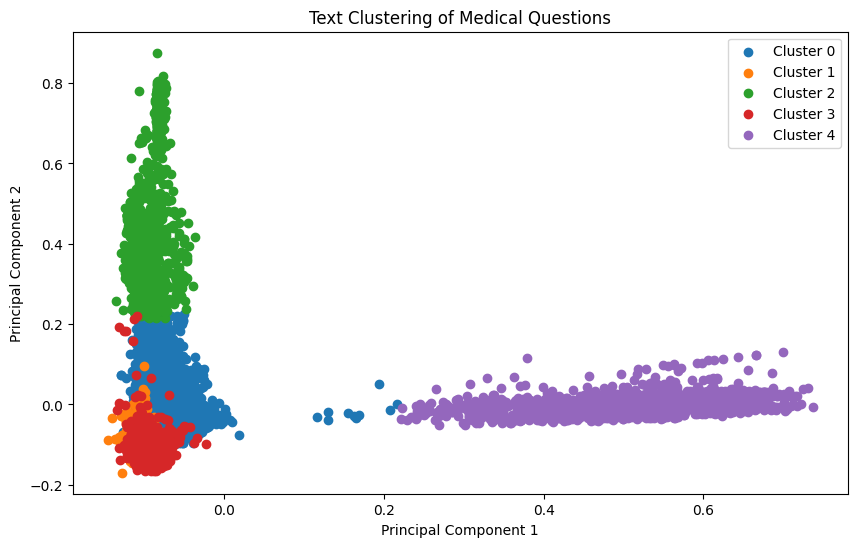

Cluster 0 - Sample Question: What are the treatments for Reye's Syndrome ?

Cluster 1 - Sample Question: What are the treatments for mucopolysaccharidosis type IV ?

Cluster 2 - Sample Question: Is adermatoglyphia inherited ?

Cluster 3 - Sample Question: What are the stages of Small Cell Lung Cancer ?

Cluster 4 - Sample Question: What are the symptoms of Neuroblastoma ?



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

documents = df['Question'].fillna('') + ' ' + df['Answer'].fillna('')
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    plt.scatter(X_pca[df['Cluster'] == cluster, 0], X_pca[df['Cluster'] == cluster, 1], label=f'Cluster {cluster}')

plt.title('Text Clustering of Medical Questions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

for cluster in range(num_clusters):
    sample_question = df[df['Cluster'] == cluster]['Question'].sample(n=1).values[0]
    print(f"Cluster {cluster} - Sample Question: {sample_question}\n")


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

treatments = df['Answer'].dropna().tolist()
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(treatments)

num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

feature_names = vectorizer.get_feature_names_out()
topic_keywords = []
for topic_idx, topic in enumerate(lda.components_):
    top_keywords_idx = topic.argsort()[:-10 - 1:-1]  # Top 10 keywords
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    topic_keywords.append(top_keywords)

    print(f"Topic #{topic_idx + 1} Keywords: {', '.join(top_keywords)}")
    print()
df['Treatment_Topic'] = lda.transform(X).argmax(axis=1)
sample_treatments = df[['Answer', 'Treatment_Topic']].sample(10)
print("Sample Treatments with Assigned Topics:")
print(sample_treatments)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic #1 Keywords: syndrome, gene, mutations, protein, individuals, cells, affected, brain, cause, symptoms

Topic #2 Keywords: genetic, diagnosis, resources, management, testing, registry, review, medlineplus, counseling, address

Topic #3 Keywords: treatment, blood, cancer, disease, risk, heart, symptoms, people, health, help

Topic #4 Keywords: symptom, frequency, number, patients, 90, information, 25, sign, study, available

Topic #5 Keywords: gene, condition, autosomal, inherited, copy, recessive, pattern, disorder, cell, 000

Sample Treatments with Assigned Topics:
                                                  Answer  Treatment_Topic
8369   Rothmund-Thomson syndrome is a rare disorder; ...                4
925    The gene for Canavan disease has been located....                2
12963  What are the signs and symptoms of Hemangiomat...                3
11527  What causes schwannomas? The cause of schwanno...                0
8265   Mutations in the ALDH5A1 gene cause succinic 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


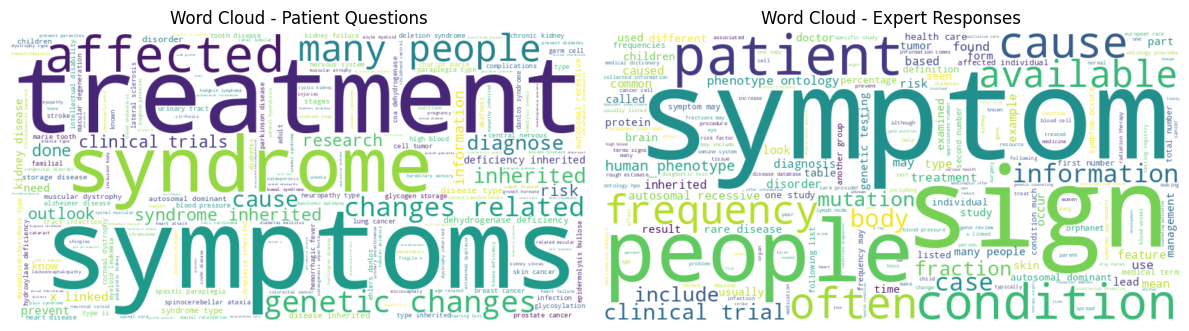

In [ ]:
from wordcloud import WordCloud

patient_questions = df['Question'].dropna().str.lower().str.cat(sep=' ')
expert_responses = df['Answer'].dropna().str.lower().str.cat(sep=' ')
wordcloud_patient = WordCloud(width=800, height=400, background_color='white').generate(patient_questions)
wordcloud_expert = WordCloud(width=800, height=400, background_color='white').generate(expert_responses)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_patient, interpolation='bilinear')
plt.title('Word Cloud - Patient Questions')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_expert, interpolation='bilinear')
plt.title('Word Cloud - Expert Responses')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
os.environ["KERAS_BACKEND"] = "jax" #or torch or tensorflow
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]="1.00"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
os.environ["KERAS_BACKEND"] = "jax"
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]="1.00"

In [ ]:
question="Who is at risk for Lymphocytic Choriomeningitis (LCM)? ?"
answer=""
prompt = f"""
<question>
{question}
</question>
\n\nAnswer:"""
print(prompt)
print(lm.generate(prompt, max_length=128))

Question: 


'Who is at risk for Lymphocytic Choriomeningitis (LCM)? ?'



Answer: 


'Individuals of all ages who come into contact with urine, feces, saliva, or blood of wild mice are potentially at risk for infection. Owners of pet mice or hamsters may be at risk for infection if these animals originate from colonies that were contaminated with LCMV, or if their animals are infected from other wild mice. Human fetuses are at risk of acquiring infection vertically from an infected mother. \n                \nLaboratory workers who work with the virus or handle infected animals are also at risk. However, this risk can be minimized by utilizing animals from sources that regularly test for the virus, wearing proper protective laboratory gear, and following appropriate safety precautions.'